# Imports

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.size': 14,
    'axes.grid': True,
    'grid.alpha': 0.2,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"

#import warnings
#warnings.filterwarnings('ignore')

# Data

In [27]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
sample = pd.read_csv('sample.csv', index_col='Id')

X_train = train.drop(columns=['Category'])
y_train = train.Category

X_test = test

In [21]:
X_train.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
Id,,,,,,,,,,,,,,,,,,,,,
0,-0.328499,1.175144,0.515354,0.293739,0.717413,0.499106,-0.163973,-0.356333,-0.439508,-0.276648,...,-0.069074,0.163611,0.827213,-0.766158,0.628716,0.608708,0.895262,-0.430845,0.222054,-1.378243
1,-0.464213,1.104540,-0.489935,-0.956223,-0.280793,0.005371,1.176738,0.158388,0.231923,-0.807865,...,0.528232,0.963157,0.673927,0.271933,-1.245576,0.451102,-0.876329,0.099235,-2.883061,0.219429
2,-1.547788,1.717030,-0.829589,0.661784,-0.537492,0.147143,0.359703,-0.163511,0.840473,0.152515,...,-1.871161,1.509097,-0.330102,-1.290021,-0.313704,0.064516,1.056933,1.029114,-1.197726,0.317935
3,0.351038,-0.070387,0.253418,-0.199843,-0.811106,0.338446,0.658384,0.808466,-0.990371,0.419608,...,0.065048,0.333310,-1.605971,0.963046,-1.889288,-1.079422,-0.695426,0.096945,-1.142165,0.377868
4,-1.081837,-2.220129,0.422766,-2.795604,-1.065393,-0.378428,0.929238,-0.381571,-1.757911,1.165773,...,-1.322272,0.352543,-1.292785,-1.270267,0.762935,-0.784592,1.183498,-0.260315,2.517893,0.713963


In [22]:
y_train.head()

Id
0     459.509469
1     681.872699
2    2087.125600
3     663.957725
4    2903.251134
Name: Category, dtype: float64

In [30]:
X_test.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
Id,,,,,,,,,,,,,,,,,,,,,
0,0.316942,1.644450,-1.049730,-0.917688,-1.235205,0.162192,-0.631035,0.359445,-0.231481,-0.462527,...,-1.583830,1.347389,0.313076,3.301484,-1.961382,-0.049537,-0.981606,1.957440,1.319010,0.070333
1,-0.739079,-2.422455,-1.212343,2.322217,-0.460501,3.135261,0.279431,-0.549328,1.051281,0.101330,...,1.551599,-0.384965,0.391077,-0.176370,1.538562,-1.699737,0.702298,0.829514,-0.064617,-0.275268
2,-0.541835,1.810515,1.735539,0.260166,1.414195,-0.438479,-0.784220,0.437135,0.694371,-0.538071,...,-0.457030,-0.051940,0.242659,-1.588924,0.022063,-0.514721,-2.014138,-1.638644,-0.126562,0.702399
3,1.136659,-1.088907,-1.015267,0.780997,0.722492,-1.390425,0.273382,0.674770,-0.046709,-1.145892,...,0.068821,-1.393991,0.385473,0.458625,1.470197,0.967956,0.553880,-0.039561,0.385272,-0.064552
4,-0.732164,-0.795239,0.471453,-0.767648,1.610427,1.191031,1.601433,0.893737,-0.509399,0.727099,...,-0.651896,-0.538936,0.146088,0.085751,1.219601,-0.266557,-1.361319,-0.754607,-1.104216,-0.364474


In [31]:
sample.head()

,Category
Id,
0,-0.558653
1,-0.003554
2,0.244771
3,-0.969728
4,-0.663033


# Data analysis

Исследуем обучающую и тестовую выборки на наличие пропусков.

In [40]:
print(f"Number of NaNs in train sample: {X_train.isnull().sum().sum()}")
print(f"Number of NaNs in test sample: {X_test.isnull().sum().sum()}")

Number of NaNs in train sample: 0
Number of NaNs in test sample: 0


Как видно, никаких пропусков нет.

Исследуем распределение целевой переменной.

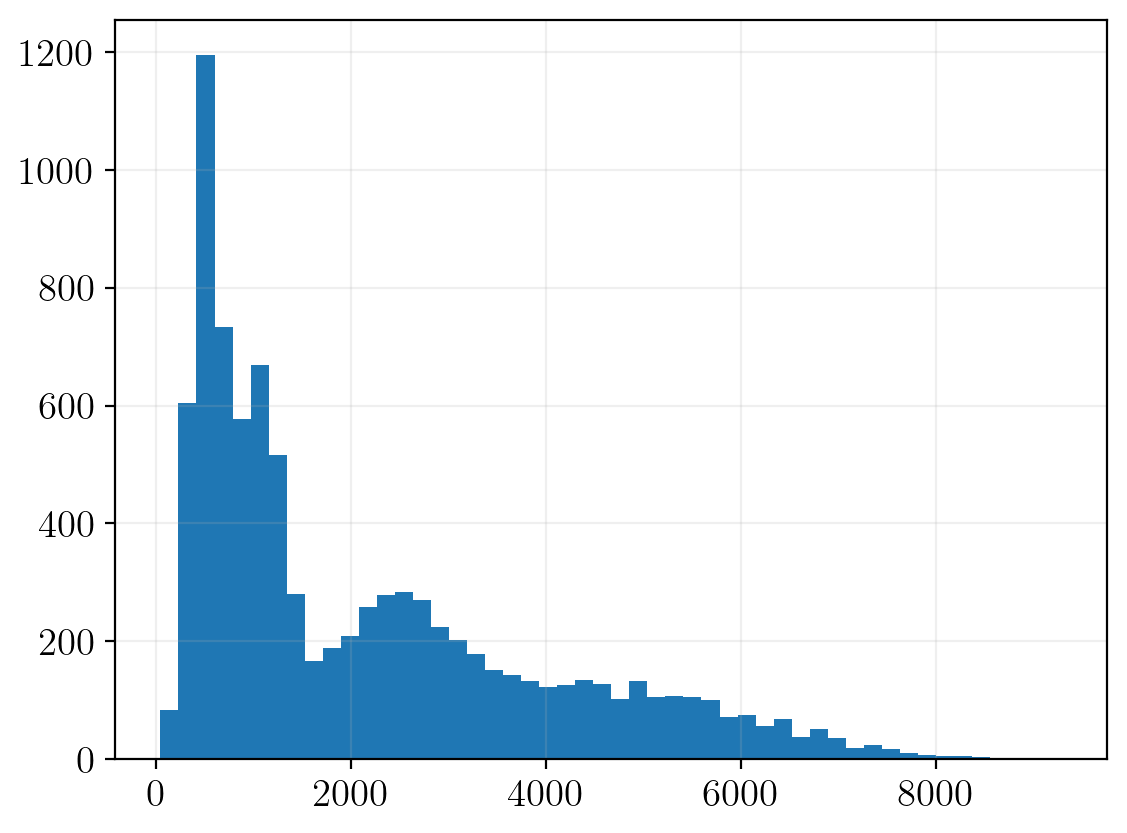

In [47]:
y_train.hist(bins=50)
plt.show()

In [63]:
y_train.value_counts()

Category
459.509469     1
3873.429068    1
3789.422318    1
378.363641     1
1039.384028    1
              ..
4758.213578    1
4072.303370    1
3191.673913    1
3774.527404    1
1284.877164    1
Name: count, Length: 9000, dtype: int64

Кроме того, видно, что перед нами действительно задача регрессии, поскольку каждое значение целевой переменной принимает уникальное значение.

Рассмотрим распределение каждого признака.

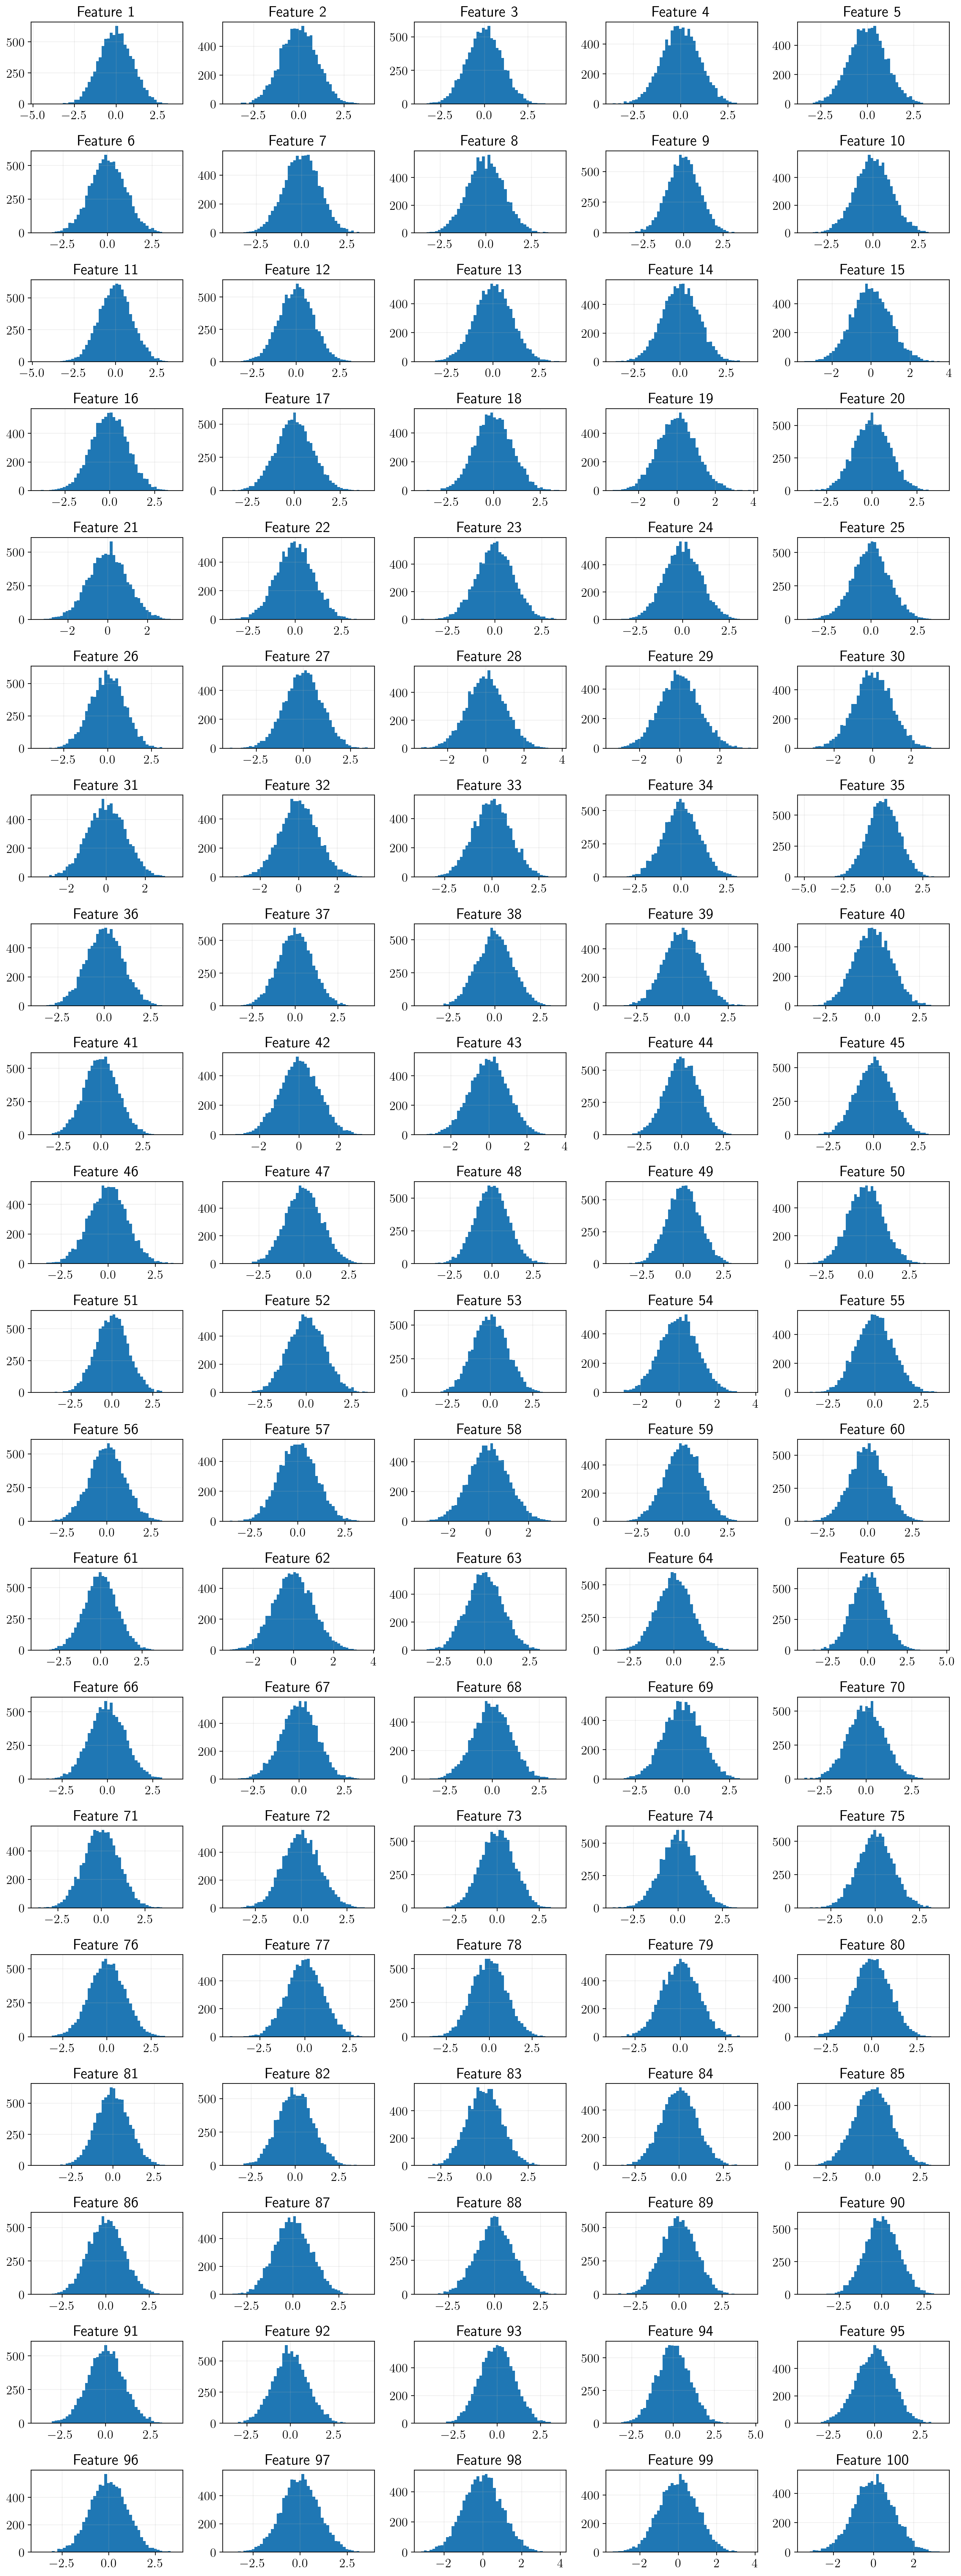

In [71]:
fig, ax = plt.subplots(20, 5, figsize=(15, 40))

for num in range(X_train.shape[1]):
    i = num // 5
    j = num % 5
    X_train[f'x_{num+1}'].hist(bins=50, ax=ax[i, j])
    ax[i, j].set_title(f"Feature {num+1}")

plt.tight_layout()
plt.show()

Несложно заметить, что каждый признак скорее всего имеет нормальное распределение $\mathcal{N}(0, 1)$, что достаточно хорошо.

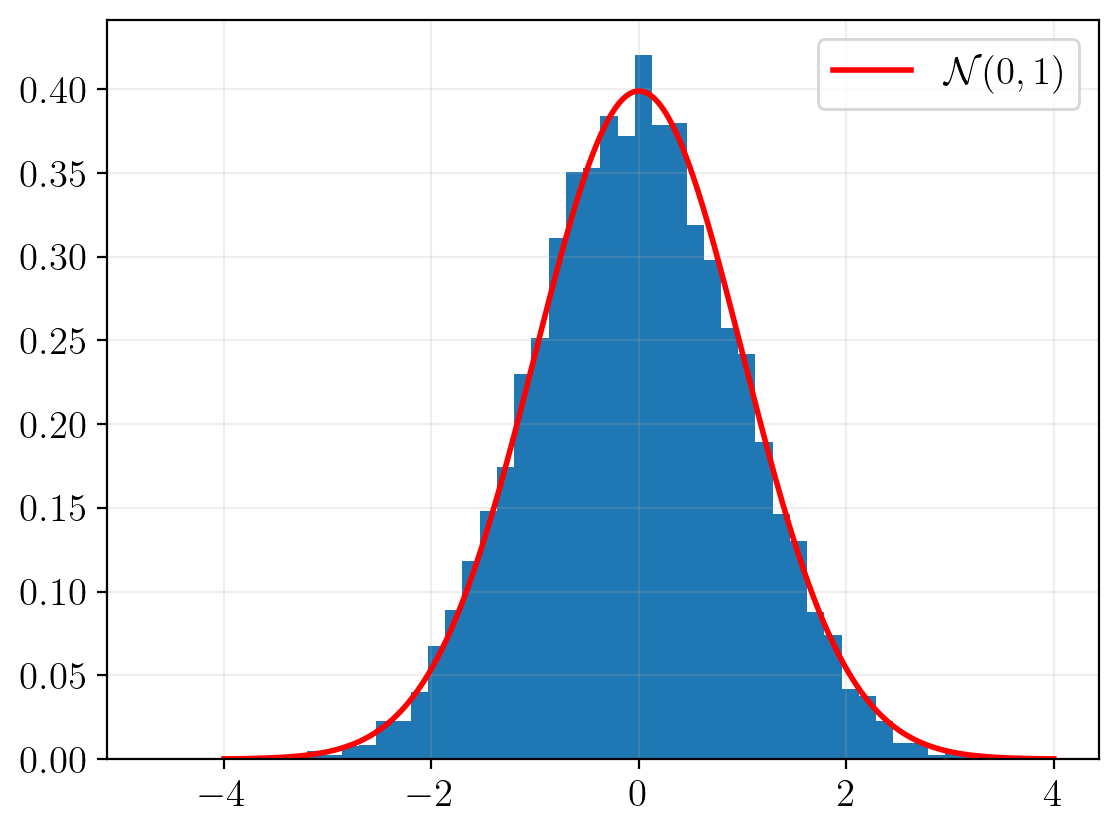

In [85]:
X_train['x_1'].hist(bins=50, density=1)
plt.plot(np.linspace(-4, 4, 1000), stats.norm.pdf(np.linspace(-4, 4, 1000)), color='red', label=r"$\mathcal{N}(0, 1)$")
plt.legend()
plt.show()

# Feature selection

Рассмотрим корреляцию Пирсона.

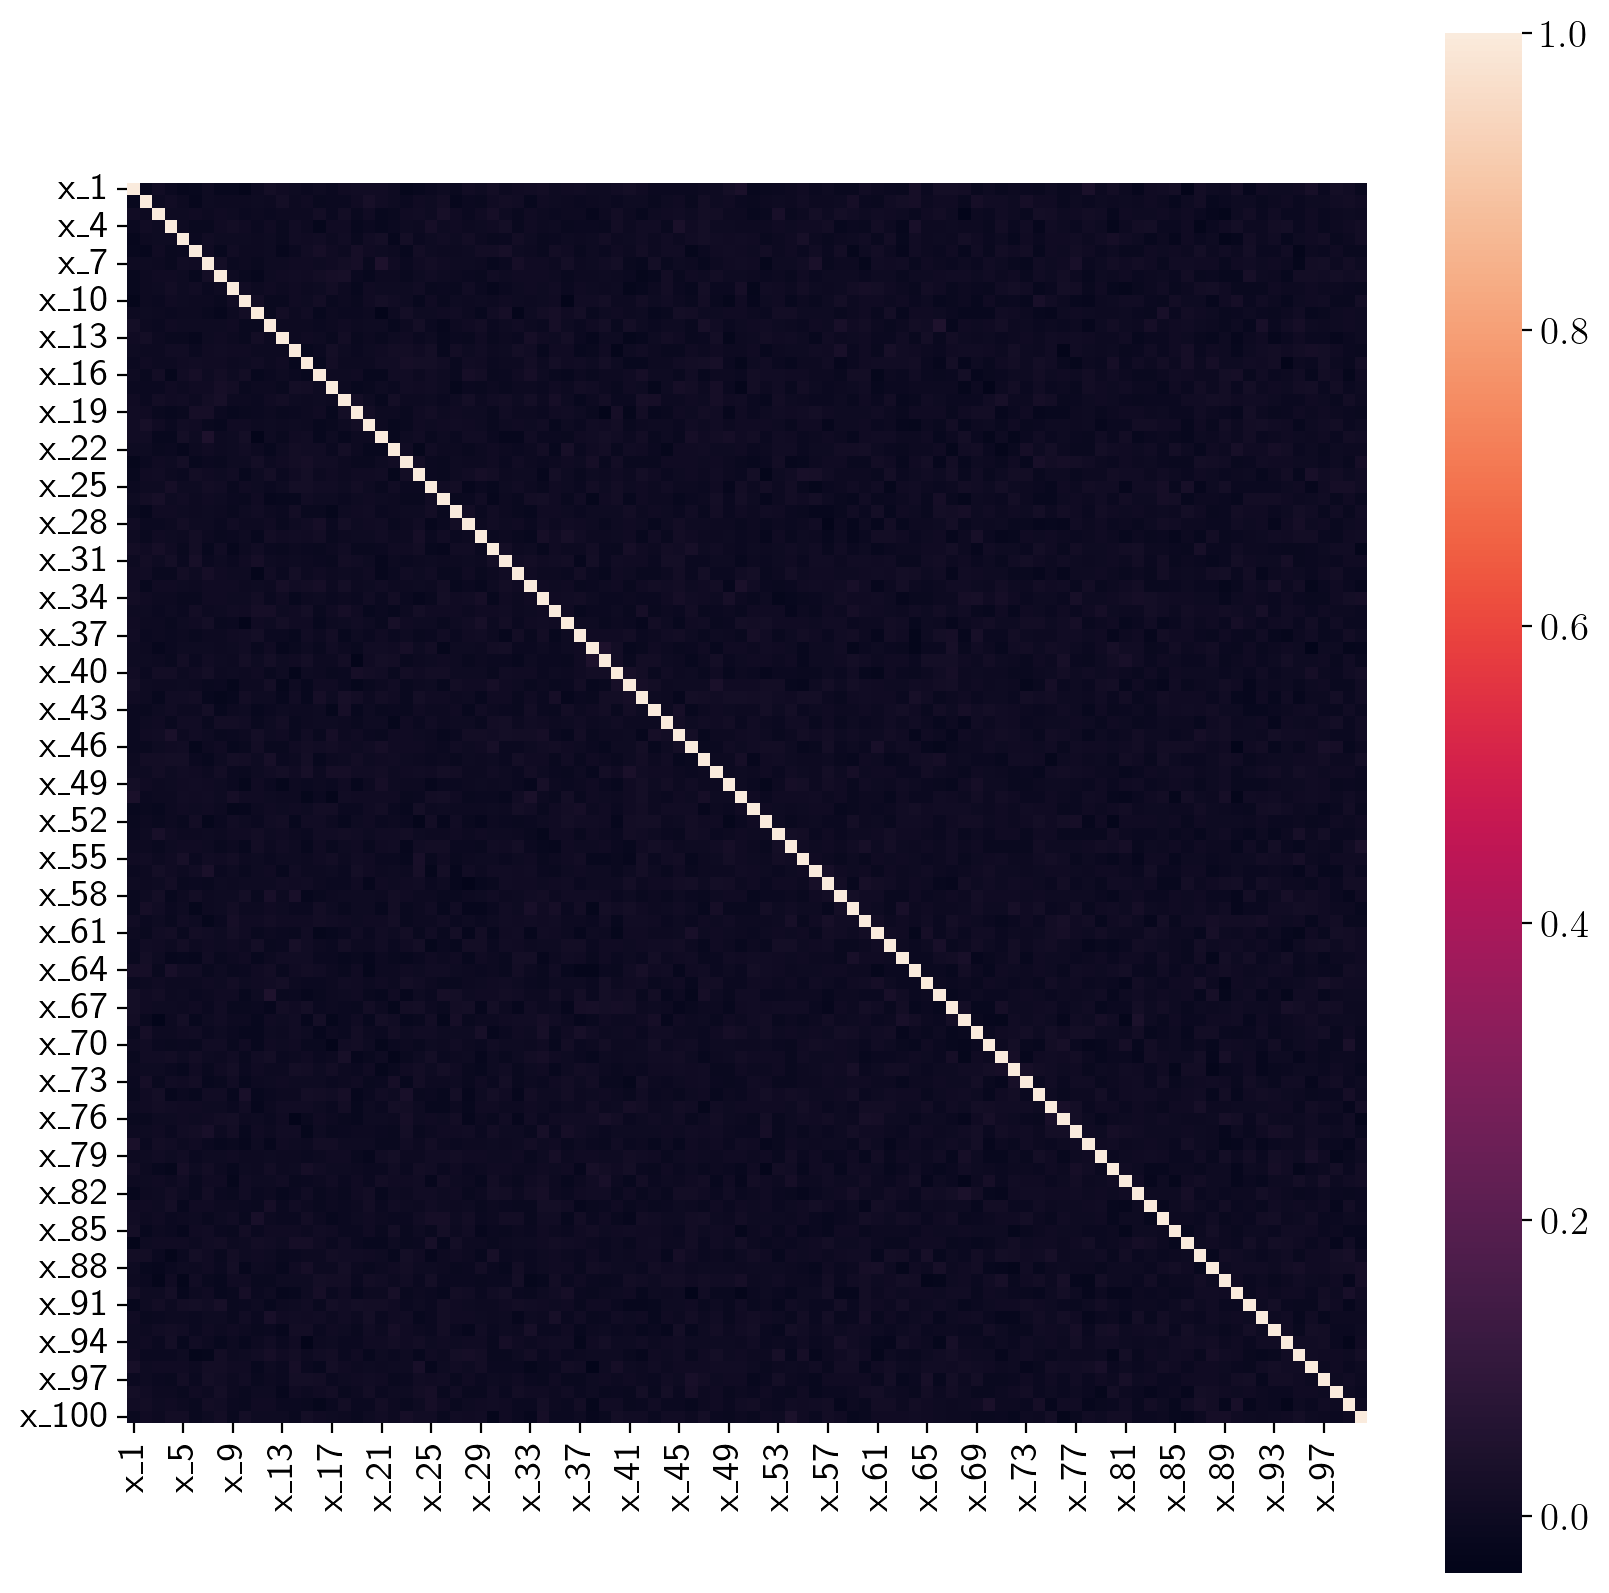

In [162]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(method='pearson'), square=True)
plt.grid(alpha=0)
plt.show()

Теперь корреляцию Спирмена.

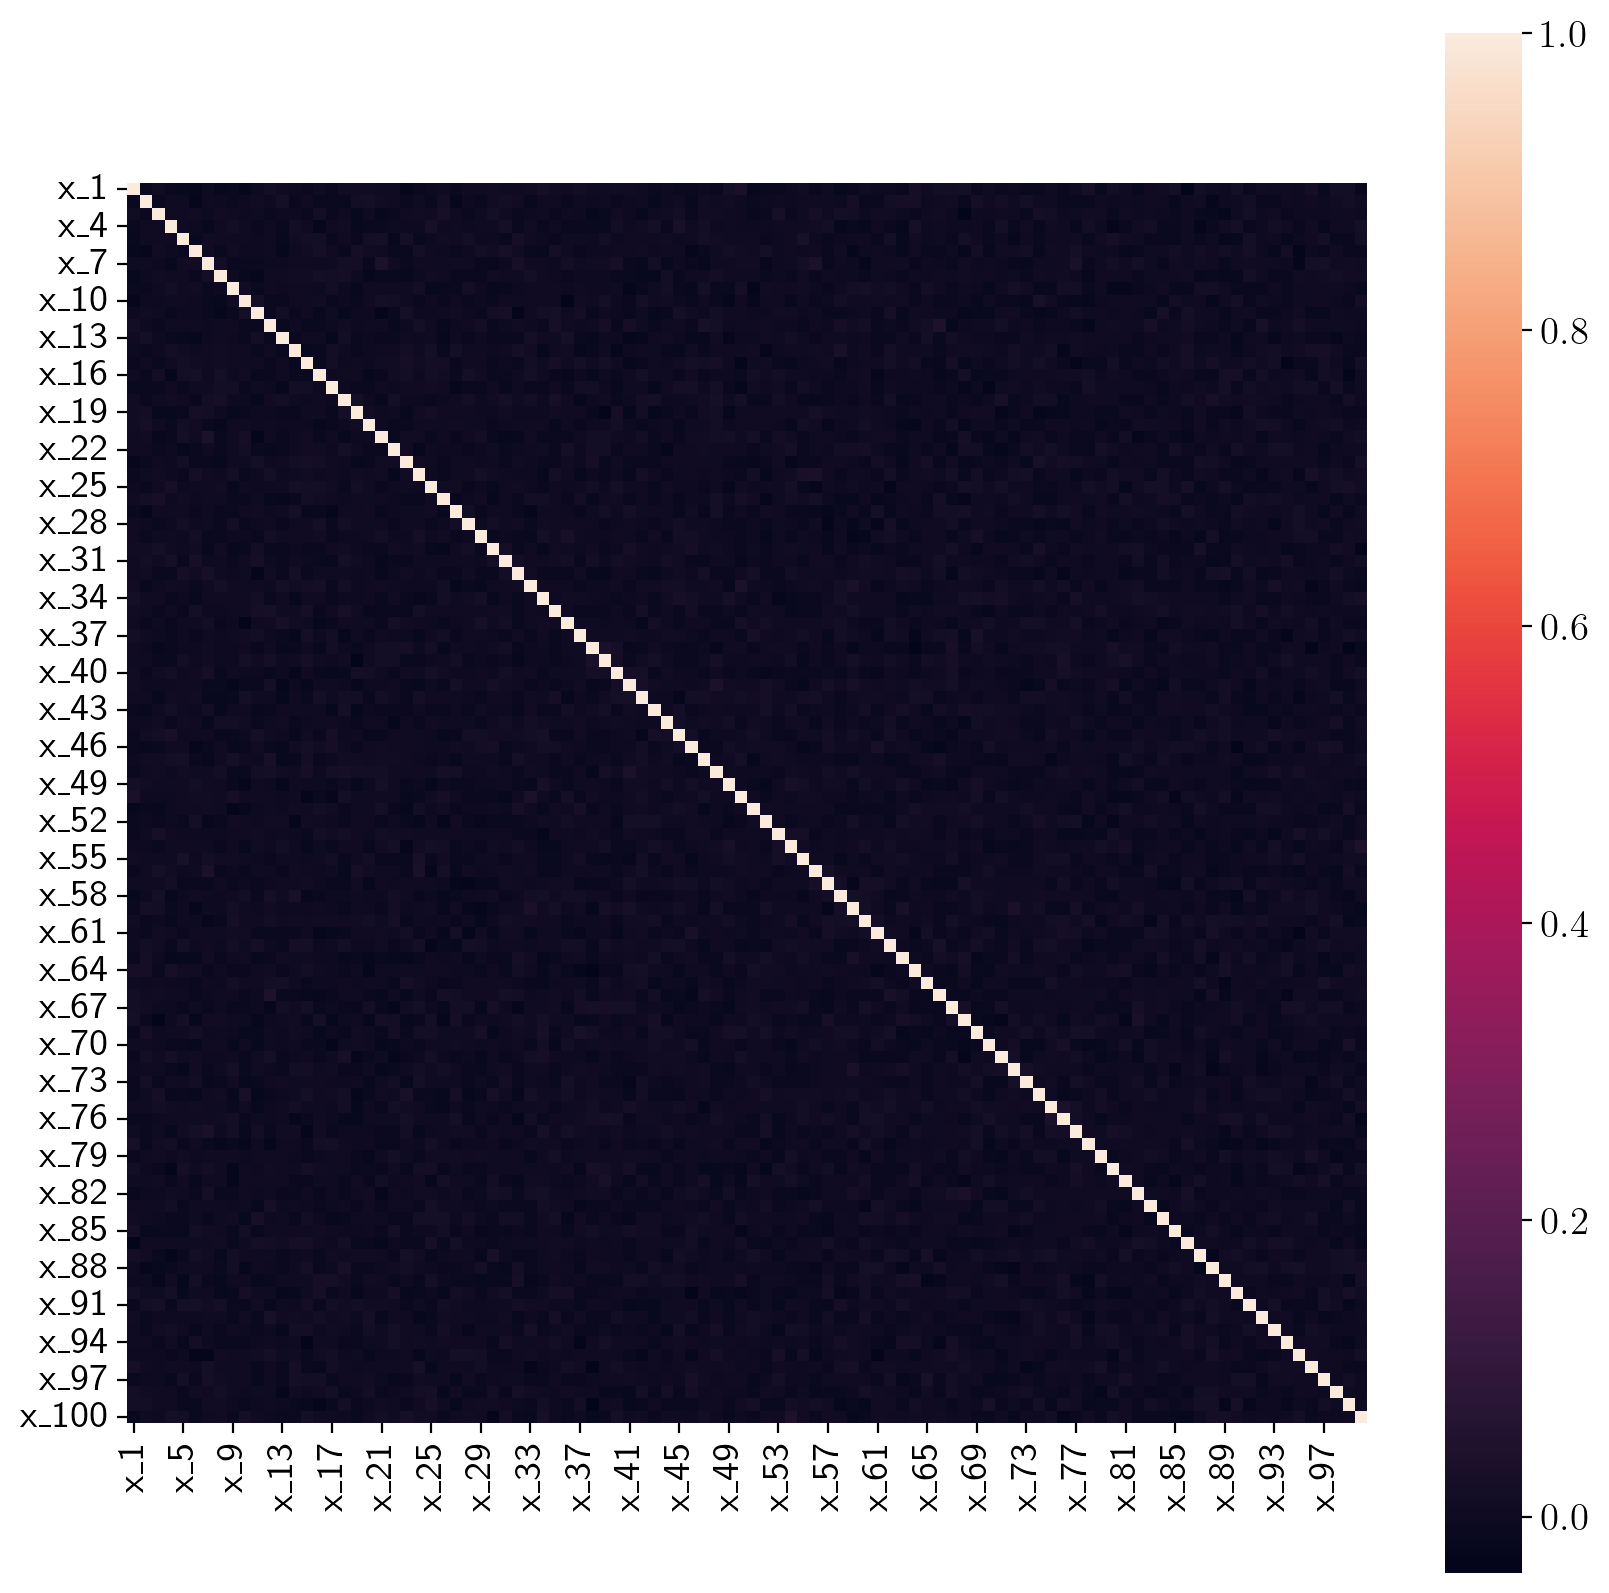

In [163]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(method='spearman'), square=True)
plt.grid(alpha=0)
plt.show()

Хм, получается, что признаки нескоррелированы.

Теперь исследуем связь между каждым признаком и целевой переменной.

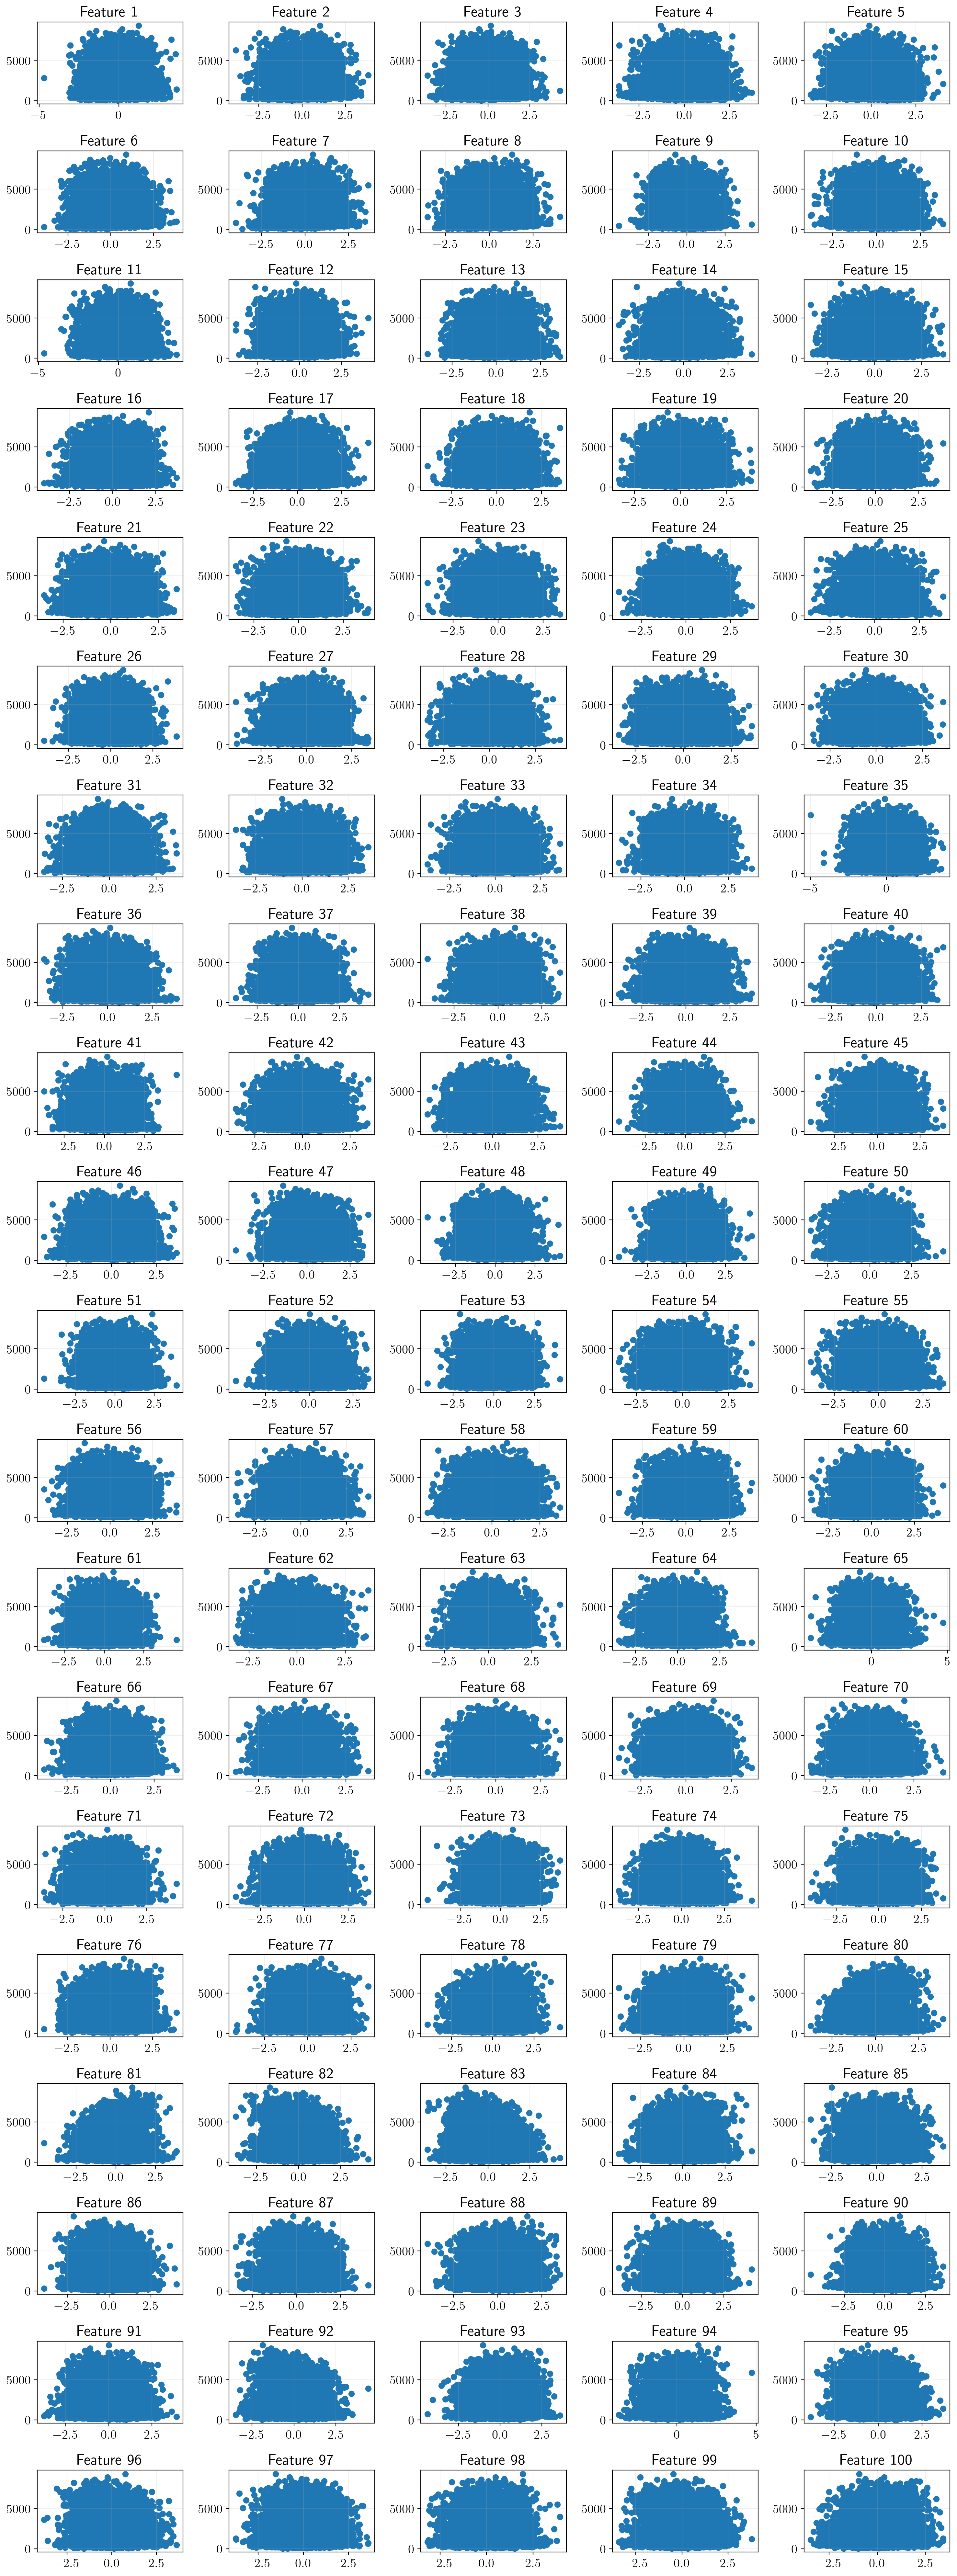

In [99]:
fig, ax = plt.subplots(20, 5, figsize=(15, 40))

for num in range(X_train.shape[1]):
    i = num // 5
    j = num % 5
    ax[i, j].scatter(X_train[f"x_{num+1}"], y_train)
    ax[i, j].set_title(f"Feature {num+1}")

plt.tight_layout()
plt.show()

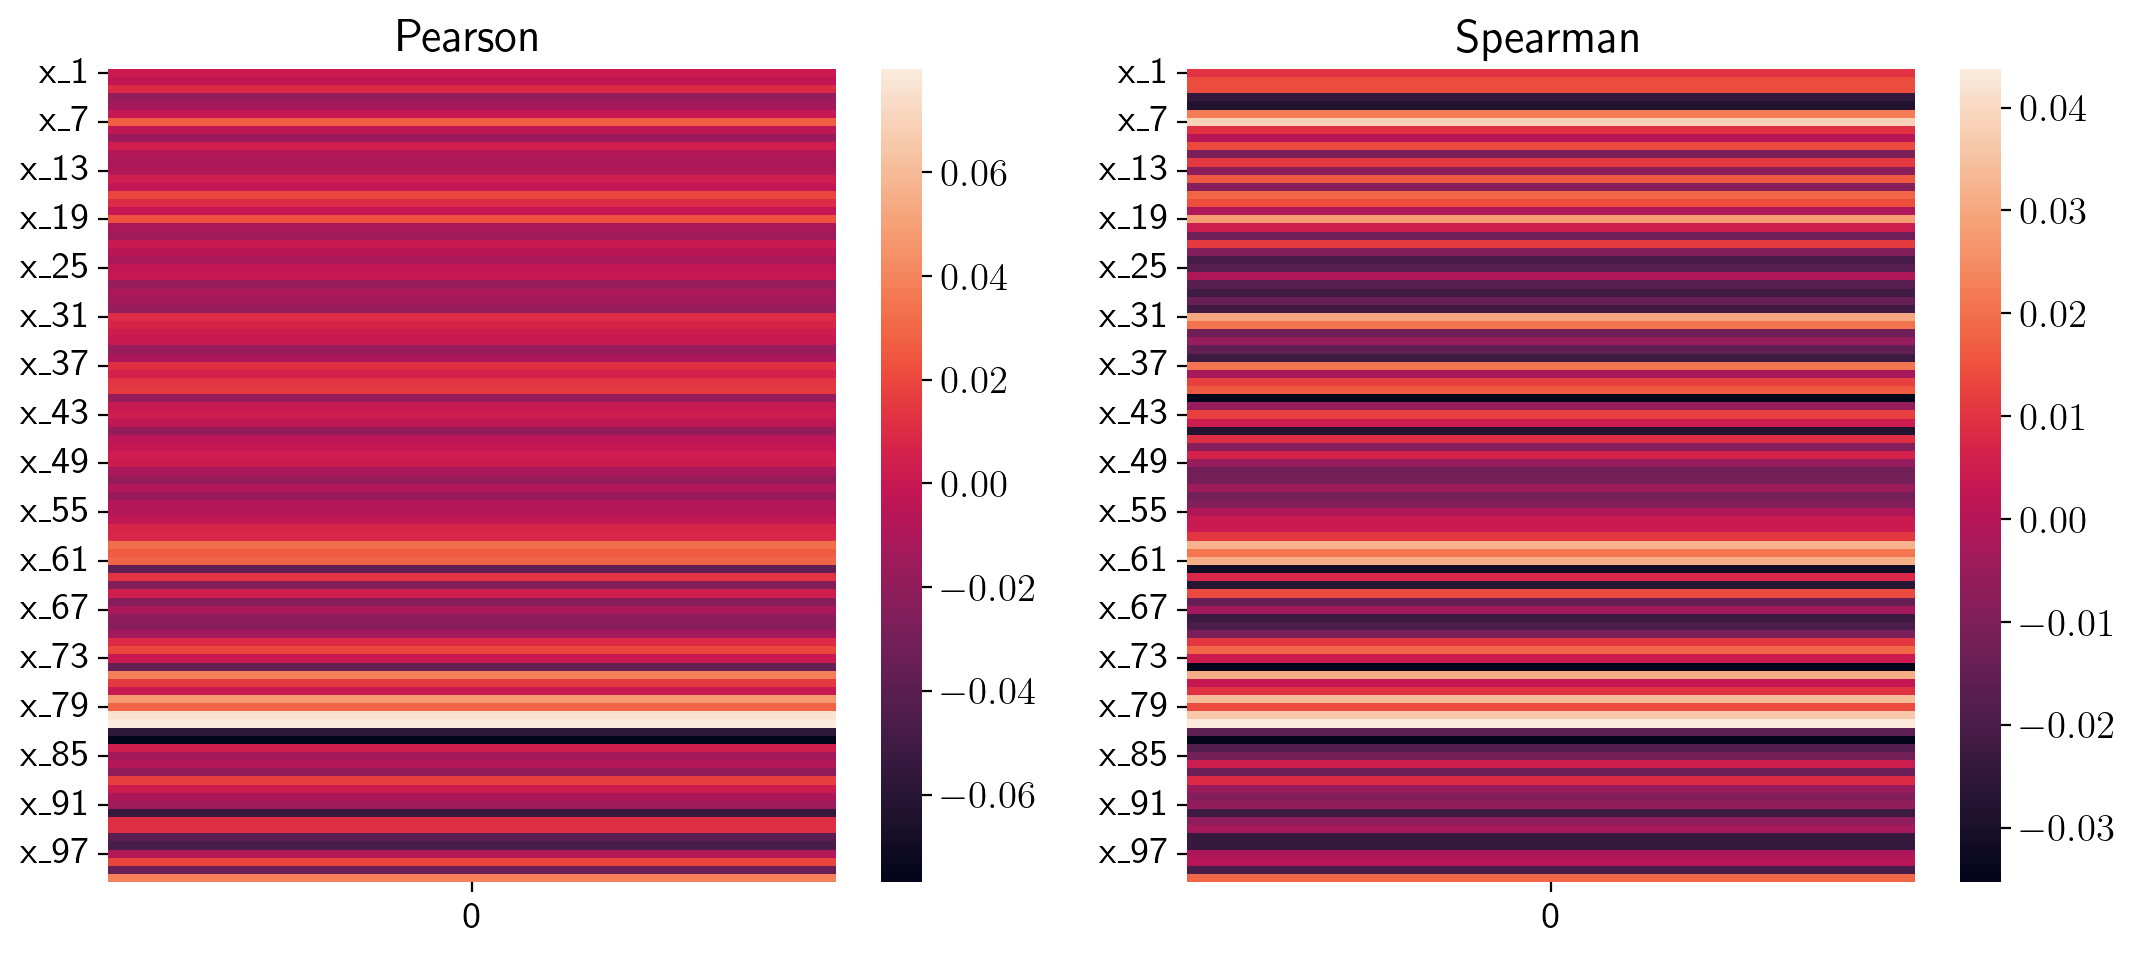

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

sns.heatmap(pd.DataFrame(X_train.corrwith(y_train, method='pearson')), ax=ax1)
ax1.set_title("Pearson")
ax1.grid(alpha=0)

sns.heatmap(pd.DataFrame(X_train.corrwith(y_train, method='spearman')), ax=ax2)
ax2.set_title("Spearman")
ax2.grid(alpha=0)

plt.tight_layout()
plt.show()

Посмотрим, как здесь себя проявит PCA.

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=X_train.shape[1])

In [102]:
pca.fit(X_train)

PCA(n_components=100)

$$ E_m = \dfrac{\lambda_{m+1} + \ldots + \lambda_n}{\lambda_1 + \ldots + \lambda_n} $$

In [113]:
E = pca.explained_variance_ratio_[::-1].cumsum()[:-1][::-1]

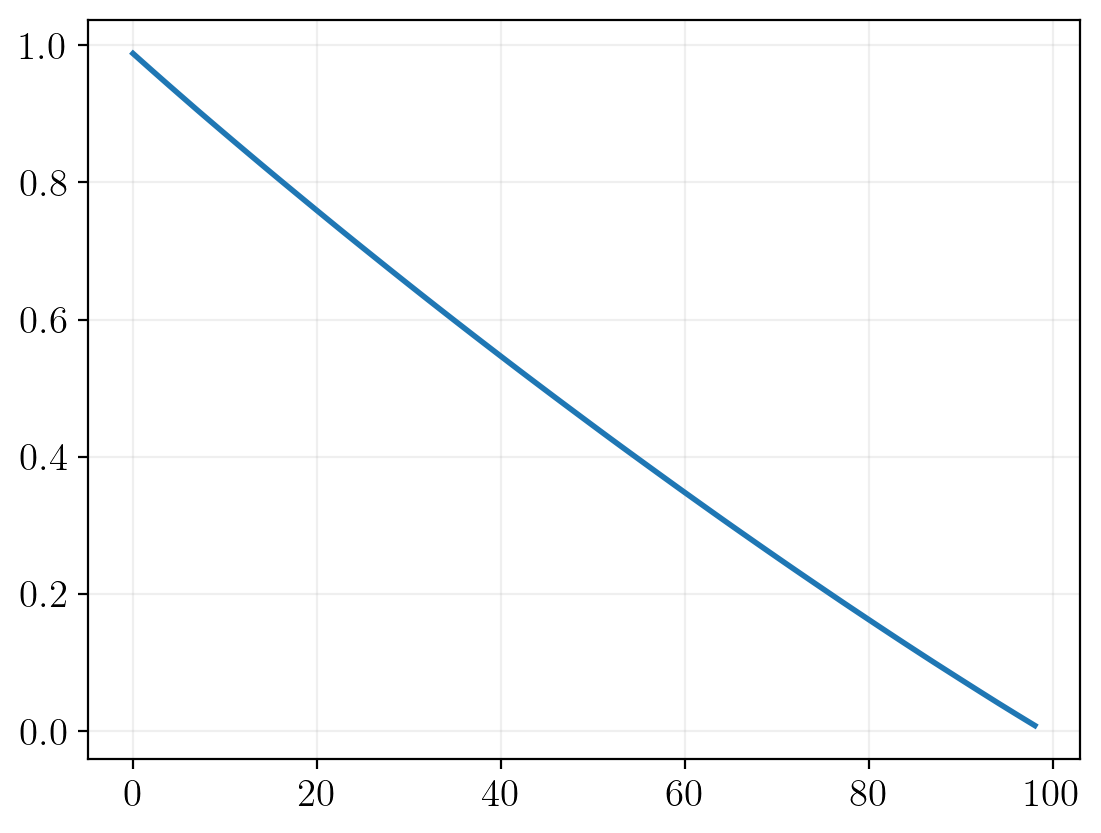

In [123]:
plt.plot(E)
plt.show()

In [126]:
pca.explained_variance_ratio_

array([0.01204484, 0.01195774, 0.01193775, 0.01183357, 0.01179533,
       0.01170829, 0.01169633, 0.0116856 , 0.01151217, 0.01147657,
       0.01143295, 0.01138454, 0.01133494, 0.01130745, 0.01127158,
       0.01121313, 0.01117895, 0.01111422, 0.01107714, 0.01106828,
       0.01103468, 0.01101659, 0.01097447, 0.01092378, 0.01085115,
       0.01080749, 0.0107695 , 0.0107675 , 0.01075704, 0.01068564,
       0.01065635, 0.01062355, 0.01058638, 0.01053511, 0.01050915,
       0.0104628 , 0.01042184, 0.01039831, 0.01033242, 0.01031096,
       0.01029073, 0.01025727, 0.01023446, 0.01017089, 0.01012861,
       0.01011408, 0.01008732, 0.01003522, 0.01000473, 0.00999575,
       0.00996826, 0.00995439, 0.00989737, 0.00984017, 0.00979931,
       0.00975944, 0.00974857, 0.0097202 , 0.00969647, 0.00968375,
       0.0096229 , 0.0095861 , 0.009564  , 0.00955175, 0.00951789,
       0.00945696, 0.00940712, 0.00937402, 0.00936601, 0.00933061,
       0.00928637, 0.00926732, 0.00923577, 0.00917228, 0.00913

Это плохо, поскольку такое ощущение, что все компонетны важны, ведь соответствующие собственные значение практически одинаковы.

# Regression models

Импортируем рассматриваемые модели.

In [139]:
from sklearn.linear_model import LinearRegression
#from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

Импотируем интересующие метрики и оценивающие штуки.

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Создадим dict для записи результатов.

In [182]:
MSEs = dict()

## LinearRegression

In [186]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1)
MSEs['LinearRegression'] = -scores.mean()

## XGBRegressor

In [189]:
xgbreg = XGBRegressor()

In [202]:
param_grid = {
    'n_estimators': [1000],
    'max_depth': [2, 3, 5],
    'eta': [1e-3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

In [203]:
gscv = GridSearchCV(xgbreg, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [204]:
gscv.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=1.0,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eta=0.001,
                                    eval_metric=None, feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=No...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1.0], 'eta': [0.001],
                         'max_depth': [2, 3, 5], 'n_estimators': [1000],
                         'subsample': [1.0]},
             scoring='neg_mean_squared_error')

In [212]:
MSEs['XGBRegressor'] = -gscv.best_score_

## CatBoostRegressor

In [215]:
cbreg = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.2,
    depth=2
)

In [216]:
cbreg.fit(X_train, y_train)

0:	learn: 1812.9577840	total: 3.64ms	remaining: 3.64s
1:	learn: 1811.0401105	total: 6.62ms	remaining: 3.3s
2:	learn: 1810.0229214	total: 9.08ms	remaining: 3.02s
3:	learn: 1808.6376574	total: 13ms	remaining: 3.23s
4:	learn: 1806.9470100	total: 16ms	remaining: 3.18s
5:	learn: 1805.7212118	total: 18.1ms	remaining: 3s
6:	learn: 1803.8079108	total: 20.1ms	remaining: 2.85s
7:	learn: 1802.4101937	total: 21.2ms	remaining: 2.63s
8:	learn: 1801.2609272	total: 22.4ms	remaining: 2.47s
9:	learn: 1799.6047455	total: 26.6ms	remaining: 2.63s
10:	learn: 1798.1699588	total: 29.1ms	remaining: 2.62s
11:	learn: 1797.1329030	total: 32ms	remaining: 2.64s
12:	learn: 1796.3620654	total: 33ms	remaining: 2.5s
13:	learn: 1795.1521531	total: 33.9ms	remaining: 2.39s
14:	learn: 1794.4814769	total: 34.8ms	remaining: 2.29s
15:	learn: 1793.2767897	total: 35.7ms	remaining: 2.2s
16:	learn: 1792.3250728	total: 36.6ms	remaining: 2.12s
17:	learn: 1791.6456171	total: 37.6ms	remaining: 2.05s
18:	learn: 1790.9948629	total: 38.

In [223]:
y_pred = cbreg.predict(X_train)
MSEs['CatBoostRegressor'] = mean_squared_error(y_train, y_pred)

## SGDRegressor

In [225]:
sgdreg = SGDRegressor()

In [226]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [1e-1, 1e-3, 1e-5],
}

In [227]:
gscv = GridSearchCV(sgdreg, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [228]:
gscv.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.001, 1e-05],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [230]:
MSEs['SGDRegressor'] = -gscv.best_score_

## KernelRidge

In [232]:
kernelridge = KernelRidge()

In [236]:
param_grid = {
    'alpha': [1e-3, 1e0, 1e3],
    'kernel': ['linear', 'rbf'],
}

In [237]:
gscv = GridSearchCV(kernelridge, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [238]:
gscv.fit(X_train, y_train)

python(10425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(10428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


GridSearchCV(estimator=KernelRidge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 1.0, 1000.0],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [239]:
MSEs['KernelRidge'] = -gscv.best_score_

## ElasticNet

In [241]:
elasticnet = ElasticNet()

In [242]:
param_grid = {
    'alpha': [1e-5, 1e-3, 1e-1, 1e1, 1e3, 1e5]
}

In [243]:
gscv = GridSearchCV(elasticnet, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [244]:
gscv.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.001, 0.1, 10.0, 1000.0, 100000.0]},
             scoring='neg_mean_squared_error')

In [245]:
MSEs['ElasticNet'] = -gscv.best_score_

In [246]:
MSEs['ElasticNet']

3195007.114552614

## BayesianRidge

In [247]:
bridge = BayesianRidge()

In [248]:
param_grid = {
    'alpha_1': [1e-6, 1e-4, 1e-2],
    'alpha_2': [1e-6, 1e-4, 1e-2],
    'lambda_1': [1e-6, 1e-4, 1e-2],
    'lambda_2': [1e-6, 1e-4, 1e-2]
}

In [249]:
gscv = GridSearchCV(bridge, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [250]:
gscv.fit(X_train, y_train)

GridSearchCV(estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_1': [1e-06, 0.0001, 0.01],
                         'alpha_2': [1e-06, 0.0001, 0.01],
                         'lambda_1': [1e-06, 0.0001, 0.01],
                         'lambda_2': [1e-06, 0.0001, 0.01]},
             scoring='neg_mean_squared_error')

In [251]:
MSEs['BayesianRidge'] = -gscv.best_score_

In [252]:
MSEs['BayesianRidge']

3189833.806559729

## GradientBoostingRegressor

In [262]:
gbreg = GradientBoostingRegressor()

In [263]:
param_grid = {
    'learning_rate': [1e-1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

In [264]:
gscv = GridSearchCV(gbreg, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [265]:
gscv.fit(X_train, y_train)

python(10722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(10726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [266]:
MSEs['GradientBoostingRegressor'] = -gscv.best_score_

In [267]:
MSEs['GradientBoostingRegressor']

3255373.9364233767

## SVR

In [270]:
svr = SVR()

In [271]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1e-3, 1e-1, 1e1, 1e3]
}

In [272]:
gscv = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [273]:
gscv.fit(X_train, y_train)

python(10800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(10802) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 10.0, 1000.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [274]:
MSEs['SVR'] = -gscv.best_score_

In [275]:
MSEs['SVR']

3540749.021331176

## Comparison

In [278]:
for model in MSEs:
    print(f"{model}: {MSEs[model]:.2f}")

LinearRegression: 3198446.34
XGBRegressor: 3251624.71
CatBoostRegressor: 1844311.36
SGDRegressor: 3209171.52
KernelRidge: 3380358.90
ElasticNet: 3195007.11
BayesianRidge: 3189833.81
GradientBoostingRegressor: 3255373.94
SVR: 3540749.02
